<a href="https://colab.research.google.com/github/udghosh/Temp_hackathon/blob/main/Temp_Submission_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Aurora_RoundHacks/new_train.csv')
data = pd.DataFrame(data)
data.head()

,date,temp
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12
3,04-01-1980,9.23
4,05-01-1980,3.20


In [ ]:
data.describe()

,temp
count,11323.000000
mean,15.573259
std,7.877191
min,-5.110000
25%,8.390000
50%,15.990000
75%,22.055000
max,32.390000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11323 entries, 0 to 11322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11323 non-null  object 
 1   temp    11323 non-null  float64
dtypes: float64(1), object(1)
memory usage: 177.0+ KB


In [ ]:
data['date'] = pd.to_datetime(data['date'])



In [ ]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['week'] = data['date'].dt.week
data['which_day'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,date,temp,year,month,day,week,which_day,quarter
0,1980-01-01,4.16,1980,1,1,1,1,1
1,1980-02-01,4.06,1980,2,1,5,4,1
2,1980-03-01,7.12,1980,3,1,9,5,1
3,1980-04-01,9.23,1980,4,1,14,1,2
4,1980-05-01,3.20,1980,5,1,18,3,2


In [ ]:
data1=data[(data['month']==1) & (data['year']==2010)]

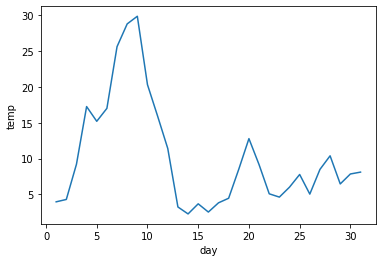

In [ ]:
sns.lineplot(x=data1['day'],y=data1['temp'])


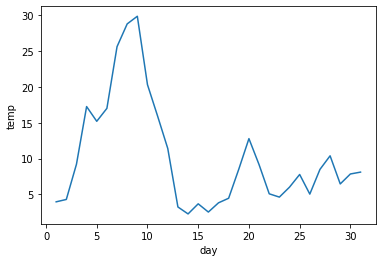

In [ ]:
sns.lineplot(x=data1['day'],y=data1['temp'])

In [ ]:
data2=data[ (data['year']==2000)]

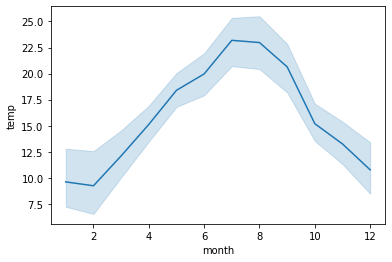

In [ ]:
sns.lineplot(x=data2['month'],y=data2['temp'])

In [ ]:
maps={1:0,2:0,3:0,4:1,5:1,6:1,7:1,8:1,9:1,10:0,11:0,12:0}
data['months_map']=data['month'].map(maps)


In [ ]:

days=[]
for (i,j) in zip(data['month'],data['day']):
  if(i<=3 and i>=10):
    if(j<=3 and i<15):
      days.append(1)
    else:
      days.append(0)
  else:
    if(j<5):
      days.append(0)
    else:
      days.append(1)
    

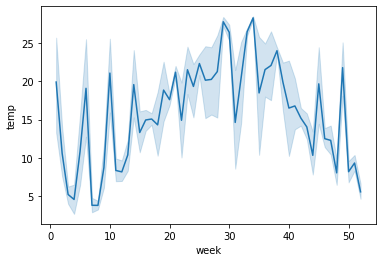

In [ ]:
data2=data[ (data['year']==2000)]

sns.lineplot(x=data2['week'],y=data2['temp'])


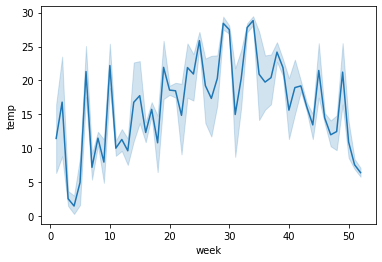

In [ ]:
data2=data[ (data['year']==1990)]

sns.lineplot(x=data2['week'],y=data2['temp'])


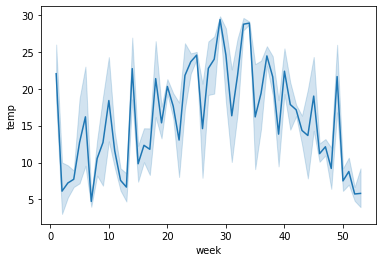

In [ ]:
data2=data[ (data['year']==2010)]

sns.lineplot(x=data2['week'],y=data2['temp'])


In [ ]:
week=[]
for i in data['week']:
  if(i<=15 or i>=40):
    week.append(0)
  else:
    week.append(1)
week

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,


In [ ]:
data['days']=days

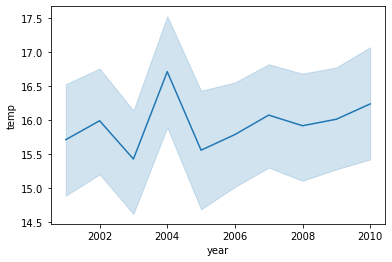

In [ ]:
data3=data[data['year']>2000]
sns.lineplot(x=data3['year'],y=data3['temp'])


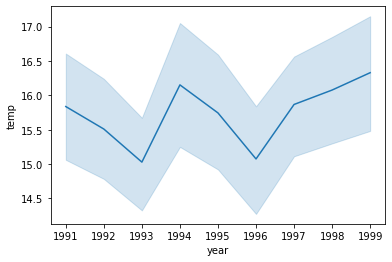

In [ ]:
data3=data[(data['year']<2000)&  (data['year']>1990)]
sns.lineplot(x=data3['year'],y=data3['temp'])


In [ ]:
# years={1980:1,1981:0,1982:2,1983:2,1984:0,1985:2,1986:1,1987:1,1988:1,1989:2,1990:2,1991:1,1992:1,1993:0,1994:2,1995:1,1996:0,1997:1,1998:2,1999:2,2000:1,2001:1,2002:2,2003:1,2004:2,2005:1,2006:0,2007:1,2008:1,2009:1,2010:1}
# data['years']=data['year'].map(years)

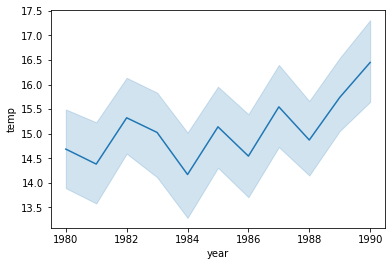

In [ ]:
data3=data[(data['year']<=1990)&  (data['year']>=1980)]
sns.lineplot(x=data3['year'],y=data3['temp'])

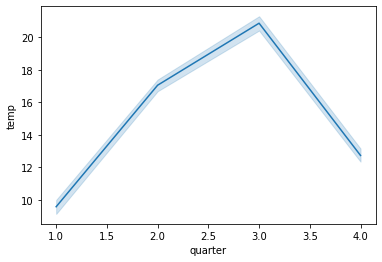

In [ ]:
data3=data[(data['year']<=1990)&  (data['year']>=1980)]
sns.lineplot(x=data3['quarter'],y=data3['temp'])

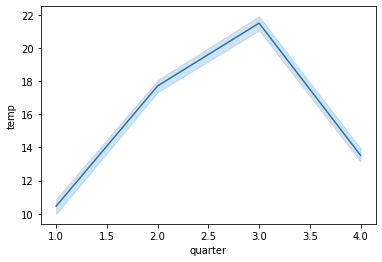

In [ ]:
data3=data[(data['year']<=2000)&  (data['year']>=1990)]
sns.lineplot(x=data3['quarter'],y=data3['temp'])

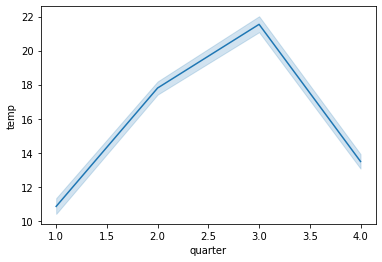

In [ ]:
data3=data[data['year']>2000]
sns.lineplot(x=data3['quarter'],y=data3['temp'])


In [ ]:
# data[data['quarter']==]

In [ ]:
q_map={1:0,2:1,3:1,4:0}
data['quarter']=data['quarter'].map(q_map)

In [ ]:
data.groupby('year')['temp'].mean()

year
1980    14.685792
1981    14.380466
1982    15.323151
1983    15.024575
1984    14.168197
1985    15.139260
1986    14.543096
1987    15.545890
1988    14.870902
1989    15.737918
1990    16.450274
1991    15.836630
1992    15.509262
1993    15.028082
1994    16.151753
1995    15.743726
1996    15.074098
1997    15.866932
1998    16.076767
1999    16.329151
2000    15.893251
2001    15.709370
2002    15.987068
2003    15.425123
2004    16.707869
2005    15.554986
2006    15.784192
2007    16.070301
2008    15.914126
2009    16.009260
2010    16.234384
Name: temp, dtype: float64

In [ ]:
data.groupby('quarter')['temp'].mean()

quarter
0    11.745841
1    19.385160
Name: temp, dtype: float64

In [ ]:
data.groupby('month')['temp'].mean()

month
1      8.905016
2      9.935354
3     11.923642
4     15.267731
5     17.630000
6     19.574720
7     21.925369
8     22.311811
9     19.477602
10    16.330676
11    13.062613
12    10.200083
Name: temp, dtype: float64

In [ ]:
holder1 = data.groupby('month')['temp'].max()
holder2 = data.groupby('month')['temp'].min()
print("max:", holder1, "\nmin:", holder2)

max: month
1     30.21
2     31.51
3     31.64
4     31.17
5     29.67
6     30.72
7     32.39
8     31.73
9     30.66
10    29.75
11    29.56
12    29.18
Name: temp, dtype: float64 
min: month
1    -2.05
2    -2.42
3    -1.80
4    -3.15
5    -1.68
6    -2.75
7    -5.11
8    -3.56
9    -2.33
10   -0.99
11    1.40
12    0.50
Name: temp, dtype: float64


In [ ]:
data.head()

,date,temp,year,month,day,week,which_day,quarter,months_map,days
0,1980-01-01,4.16,1980,1,1,1,1,0,0,0
1,1980-02-01,4.06,1980,2,1,5,4,0,0,0
2,1980-03-01,7.12,1980,3,1,9,5,0,0,0
3,1980-04-01,9.23,1980,4,1,14,1,1,1,0
4,1980-05-01,3.20,1980,5,1,18,3,1,1,0


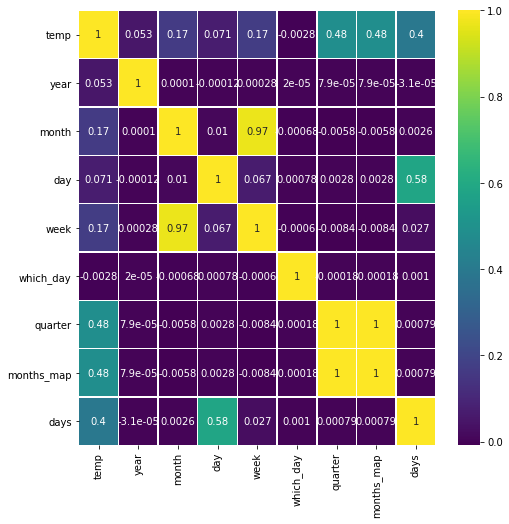

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
final_data = data.copy()

In [ ]:
final_data1 = final_data.drop(['which_day'], axis = 1)

In [ ]:
final_data2 = final_data.drop(['which_day'], axis = 1)

In [ ]:
y = final_data['temp']
x_final2 = final_data1.drop(['temp', 'date'], axis = 1)

x_train ,x_test, Y_train, Y_test = train_test_split(x_final2, y, test_size = 0.2, random_state=0)

In [ ]:
y = final_data['temp']
x_final22 = final_data2.drop(['temp', 'date'], axis = 1)

X_train ,X_test, y_train, y_test = train_test_split(x_final22, y, test_size = 0.2, random_state=0)


random_model1 = RandomForestRegressor(n_estimators=500) #max_depth=35)

#Fit
random_model1.fit(X_train, y_train)

y_pred1 = random_model1.predict(X_test)

#Checking the accuracy
random_model_accuracy1 = round(random_model1.score(X_train, y_train)*100,2)
print(round(random_model_accuracy1,2),'%')

99.16 %


In [ ]:
random_model_accuracy1 = round(random_model1.score(X_test, y_test)*100,2)
print(round(random_model_accuracy1,2),'%')

93.29 %


In [ ]:
mse = mean_squared_error(Y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

2.028933633912758


In [ ]:
random_model1 = RandomForestRegressor(n_estimators=500)
#Fit
random_model1.fit(x_train, Y_train)

y_pred1 = random_model1.predict(x_test)

#Checking the accuracy
random_model_accuracy1 = round(random_model1.score(x_train, Y_train)*100,2)
print(round(random_model_accuracy1,2),'%')

99.16 %


In [ ]:
random_model_accuracy1 = round(random_model1.score(x_test, Y_test)*100,2)
print(round(random_model_accuracy1,2),'%')

93.28 %


In [ ]:
mse = mean_squared_error(Y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

2.0292108459460922


## Creating the prediction csv

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Aurora_RoundHacks/new_test.csv')
# test_data = pd.DataFrame(test_data)

test_data.head(1)

,date
0,01-01-2011


In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [ ]:
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data['week'] = test_data['date'].dt.week
test_data['quarter']=test_data['date'].dt.quarter


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
maps={1:0,2:0,3:0,4:1,5:1,6:1,7:1,8:1,9:1,10:0,11:0,12:0}
test_data['months_map']=test_data['month'].map(maps)


In [ ]:
days=[]
for (i,j) in zip(test_data['month'],test_data['day']):
  if(i<=3 and i>=10):
    if(j<=3 and i<15):
      days.append(1)
    else:
      days.append(0)
  else:
    if(j<5):
      days.append(0)
    else:
      days.append(1)

test_data['days']=days

In [ ]:
week=[]
for i in data['week']:
  if(i<=15 or i>=40):
    week.append(0)
  else:
    week.append(1)
week

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,


In [ ]:
q_map={1:0,2:1,3:1,4:0}
test_data['quarter']=test_data['quarter'].map(q_map)

In [ ]:
x_train

,year,month,day,week,quarter,months_map,days
10089,2007,8,16,33,1,1,1
476,1981,4,21,17,1,1,1
2006,1985,6,29,26,1,1,1
4085,1991,9,3,36,1,1,0
6680,1998,4,16,16,1,1,1
...,...,...,...,...,...,...,...
4859,1993,4,21,16,1,1,1
3264,1988,8,12,32,1,1,1
9845,2006,12,15,50,0,0,1
10799,2009,7,26,30,1,1,1


In [ ]:
test_data.head()

,date,year,month,day,week,quarter,months_map,days
0,2011-01-01,2011,1,1,52,0,0,0
1,2011-02-01,2011,2,1,5,0,0,0
2,2011-03-01,2011,3,1,9,0,0,0
3,2011-04-01,2011,4,1,13,1,1,0
4,2011-05-01,2011,5,1,17,1,1,0


In [ ]:
test_data1 = test_data.drop(['date'], axis = 1)

y_pred = random_model1.predict(test_data1)

y_pred

array([ 4.33852,  5.61516,  5.0407 , ..., 21.32274, 21.43612, 19.66594])

In [ ]:
prediction = pd.Series(y_pred)
prediction.head()

0    4.33852
1    5.61516
2    5.04070
3    5.23256
4    5.23172
dtype: float64

In [ ]:
dict = {'Prediction':prediction}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
#df.to_csv('Rohan_file_1.csv', index=False) 

In [ ]:
# Artificial Neural Network
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
#earlystop = EarlyStopping(monitor= "loss")
ann.fit(x_train, Y_train, batch_size = 16, epochs = 2000)
#, callbacks = earlystop)


Epoch 1/2000
567/567 [==============================] - 2s 1ms/step - loss: 68.5401
Epoch 2/2000
567/567 [==============================] - 1s 1ms/step - loss: 64.3646
Epoch 3/2000
567/567 [==============================] - 1s 1ms/step - loss: 62.1800
Epoch 4/2000
567/567 [==============================] - 1s 1ms/step - loss: 63.3845
Epoch 5/2000
567/567 [==============================] - 1s 1ms/step - loss: 59.5880
Epoch 6/2000
567/567 [==============================] - 1s 1ms/step - loss: 58.5627
Epoch 7/2000
567/567 [==============================] - 1s 1ms/step - loss: 56.5856
Epoch 8/2000
567/567 [==============================] - 1s 1ms/step - loss: 55.0892
Epoch 9/2000
567/567 [==============================] - 1s 1ms/step - loss: 52.5270
Epoch 10/2000
567/567 [==============================] - 1s 1ms/step - loss: 50.1071
Epoch 11/2000
567/567 [==============================] - 1s 1ms/step - loss: 44.8371
Epoch 12/2000
567/567 [==============================] - 1s 1ms/step - los

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predict = ann.predict(x_train)
MSE = mean_squared_error(Y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(Y_train, predict)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n')

5.53936673446506 
 2.3535859309710916 
 0.910968131828915 



In [ ]:
predict = ann.predict(x_test)
MSE = mean_squared_error(Y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(Y_test, predict)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n')

5.928312622389745 
 2.434812646260436 
 0.9033116584938623 



In [ ]:
y_pred = ann.predict(test_data1)

pd.DataFrame(y_pred).to_csv('ANN_rohan_final_sub.csv', index=False)

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.27,max_depth = 8, alpha = 10, n_estimators = 50)
xg_reg.fit(x_train,Y_train)

[11:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.27, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:

predict = xg_reg.predict(x_train)
MSE = mean_squared_error(Y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(Y_train, predict)
SCORE = xg_reg.score(x_train, Y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

3.4265030191802817 
 1.851081580908924 
 0.9449272850643018 
 0.9449272850643018 



In [ ]:
predict = xg_reg.predict(x_test)
MSE = mean_squared_error(Y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(Y_test, predict)
SCORE = xg_reg.score(x_test, Y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

4.878914741090582 
 2.208826552966661 
 0.9204269064886568 
 0.9204269064886568 



In [ ]:
y_predict =xg_reg.predict(test_data1)
pred = pd.DataFrame()
pred["prediction"] = pd.Series(y_predict)
pred.head()


,prediction
0,5.816868
1,5.997062
2,5.351405
3,5.762473
4,4.763867


In [ ]:
pred.to_csv('Pred_rohan_xgb_final.csv', index=False)